In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# import navco
import pandas as pd
import subprocess

# Install xlrd and openpyxl packages using pip
subprocess.call(['pip', 'install', 'xlrd', 'openpyxl'])



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 791.8 kB/s eta 0:00:00a 0:00:01


0

In [3]:
navco = pd.read_excel("/kaggle/input/conflictdfs/NAVCO2-1_ForPublication (1).xls")
navco.head()

,camp_name,id,year,campyearid,location,target,loc_iso,loc_cow,loc_vdem,territory,...,reliability,coding_notes,ra_initials,tccode,lccode,start_date_obsolete,end_date_obsolete,success,progress,outcomes_refs
0,Active Forces,1,1991,1_1991,Madagascar,Didier Radsiraka,450.0,580.0,125.0,NaN,...,2.0,http://www.iss.org.za/pubs/papers/89/Paper89.h...,NaN,580.0,580.0,5/1/1991,2/10/1993,0,3,Gow 1997
1,Active Forces,1,1992,1_1992,Madagascar,Didier Radsiraka,450.0,580.0,125.0,NaN,...,2.0,Reuters lba0000020011123dobp03sm6 ; ;,NaN,580.0,580.0,5/1/1991,2/10/1993,0,3,Gow 1997
2,Active Forces,1,1993,1_1993,Madagascar,Didier Radsiraka,450.0,580.0,125.0,NaN,...,2.0,Reuters lba0000020011120dp6o06zif ; ;,NaN,580.0,580.0,5/1/1991,2/10/1993,1,4,NaN
3,Afar insurgency,2,1991,2_1991,Djibouti,Djibouti regime,262.0,522.0,113.0,NaN,...,3.0,; UCDP provides extensive coverage of the cam...,NaN,522.0,522.0,11/12/1991,26/12/1994,0,1,FRUD was able to take over large areas of the ...
4,Afar insurgency,2,1992,2_1992,Djibouti,Djibouti regime,262.0,522.0,113.0,NaN,...,3.0,; UCDP provides extensive coverage of the cam...,NaN,522.0,522.0,11/12/1991,26/12/1994,0,2,"DJIBOUTI Human Rights Practices, 1992: Departm..."


In [4]:
# import QOG
qog= pd.read_csv("/kaggle/input/newmerge2/qog_std_ts_jan24.csv")
qog.head()

/tmp/ipykernel_33/2426547213.py:2: DtypeWarning: Columns (818,822,826,830,1318,1319) have mixed types. Specify dtype option on import or set low_memory=False.
  qog= pd.read_csv("/kaggle/input/newmerge2/qog_std_ts_jan24.csv")


,ccode,cname,year,ccode_qog,cname_qog,ccodealp,ccodecow,version,cname_year,ccodealp_year,...,yri_fem40,yri_fem4160,yri_fem61,yri_meanage,yri_medianage,yri_mp30,yri_mp35,yri_mp40,yri_mp4160,yri_mp61
0,4,Afghanistan,1946,4,Afghanistan,AFG,700.0,QoGStdTSjan24,Afghanistan 1946,AFG46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,1947,4,Afghanistan,AFG,700.0,QoGStdTSjan24,Afghanistan 1947,AFG47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Afghanistan,1948,4,Afghanistan,AFG,700.0,QoGStdTSjan24,Afghanistan 1948,AFG48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Afghanistan,1949,4,Afghanistan,AFG,700.0,QoGStdTSjan24,Afghanistan 1949,AFG49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Afghanistan,1950,4,Afghanistan,AFG,700.0,QoGStdTSjan24,Afghanistan 1950,AFG50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Rename so variables match
navco['cow'] = navco["loc_cow"]
qog['cow'] = qog["ccodecow"]

In [6]:
# subset variables for merging: navco
navco1=navco[['cow', 'year', 'prim_meth', "div_gender", "div_age", "div_class", "div_urban_rural", "div_ideology", "div_ethnicity", "div_religion", "repression", "ingo_support", "dias_support"]]
navco1

,cow,year,prim_meth,div_gender,div_age,div_class,div_urban_rural,div_ideology,div_ethnicity,div_religion,repression,ingo_support,dias_support
0,580.0,1991,1,0,0,0,1,0,0,0,3,0,0
1,580.0,1992,1,0,0,0,1,0,0,0,3,0,0
2,580.0,1993,1,0,0,0,1,0,0,0,3,0,0
3,522.0,1991,0,0,1,1,1,1,0,0,3,1,1
4,522.0,1992,0,0,1,1,1,1,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,483.0,2008,0,0,0,0,0,0,1,0,3,0,1
2713,483.0,2009,0,0,0,0,0,0,1,0,3,0,1
2714,483.0,2010,0,0,0,0,0,0,1,0,3,0,1
2715,372.0,2008,0,0,0,0,0,0,0,0,3,0,0


In [25]:
# subset variables for merging: qog
qog1 = qog[['pwt_hci', 'pwt_pop', 'pwt_rgdp', 'vdem_gender', 'wdi_belmedinc', 'wdi_litrad', 'p_polity2', 'fe_cultdiv', 'gggi_ggi', 'gfs_educ', 'mad_gdppc', 'wdi_expmil', 'oecd_pphlthxp_t1c', 'bti_eo', 'wdi_foodins', 'gggi_eas', 'ucdp_type3', 'wdi_lifexp', 'cow', 'year', 'wdi_gniatlcur', 'wdi_gdpcapcon2015']]
qog1

,pwt_hci,pwt_pop,pwt_rgdp,vdem_gender,wdi_belmedinc,wdi_litrad,p_polity2,fe_cultdiv,gggi_ggi,gfs_educ,...,oecd_pphlthxp_t1c,bti_eo,wdi_foodins,gggi_eas,ucdp_type3,wdi_lifexp,cow,year,wdi_gniatlcur,wdi_gdpcapcon2015
0,NaN,NaN,NaN,0.144,NaN,NaN,-10.0,0.679267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,700.0,1946,NaN,NaN
1,NaN,NaN,NaN,0.144,NaN,NaN,-10.0,0.679267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,700.0,1947,NaN,NaN
2,NaN,NaN,NaN,0.144,NaN,NaN,-10.0,0.679267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,700.0,1948,NaN,NaN
3,NaN,NaN,NaN,0.144,NaN,NaN,-10.0,0.679267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,700.0,1949,NaN,NaN
4,NaN,NaN,NaN,0.144,NaN,NaN,-10.0,0.679267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,700.0,1950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15559,NaN,NaN,NaN,0.402,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,NaN,NaN
15560,NaN,NaN,NaN,0.402,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,NaN,NaN
15561,NaN,NaN,NaN,0.402,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974,NaN,NaN
15562,NaN,NaN,NaN,0.402,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975,NaN,NaN


In [26]:
# left join:  we will work with this dataset

left= pd.merge(qog1, navco1, on=['cow', 'year'], how='left') 
left.shape

(16377, 33)

In [27]:
year_stats = navco1['year'].describe()

min_year = year_stats['min']
max_year = year_stats['max']

print("Minimum year:", min_year)
print("Maximum year:", max_year)

Minimum year: 1945.0
Maximum year: 2013.0


In [28]:
year_stats = qog1['year'].describe()

min_year = year_stats['min']
max_year = year_stats['max']

print("Minimum year:", min_year)
print("Maximum year:", max_year)

Minimum year: 1946.0
Maximum year: 2023.0


In [29]:
# given data availablity, we will focus on 1981-2013
conflict= left[(left['year'] > 1946) & (left['year'] < 2013)]
conflict

,pwt_hci,pwt_pop,pwt_rgdp,vdem_gender,wdi_belmedinc,wdi_litrad,p_polity2,fe_cultdiv,gggi_ggi,gfs_educ,...,div_gender,div_age,div_class,div_urban_rural,div_ideology,div_ethnicity,div_religion,repression,ingo_support,dias_support
1,NaN,NaN,NaN,0.144,NaN,NaN,-10.0,0.679267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.144,NaN,NaN,-10.0,0.679267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.144,NaN,NaN,-10.0,0.679267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.144,NaN,NaN,-10.0,0.679267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,0.144,NaN,NaN,-10.0,0.679267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16372,NaN,NaN,NaN,0.402,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0
16373,NaN,NaN,NaN,0.402,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0
16374,NaN,NaN,NaN,0.402,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0
16375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0


In [30]:
# create target variables

conflict['violent'] = conflict['prim_meth']
conflict['violent'] = conflict['violent'].fillna(0)

conflict['nonviolent'] = 1 - conflict['prim_meth']
conflict['nonviolent'] = conflict['nonviolent'].fillna(0)

conflict['conflict'] = conflict['prim_meth'].notnull().astype(int)

/tmp/ipykernel_33/1341711347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict['violent'] = conflict['prim_meth']
/tmp/ipykernel_33/1341711347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict['violent'] = conflict['violent'].fillna(0)
/tmp/ipykernel_33/1341711347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

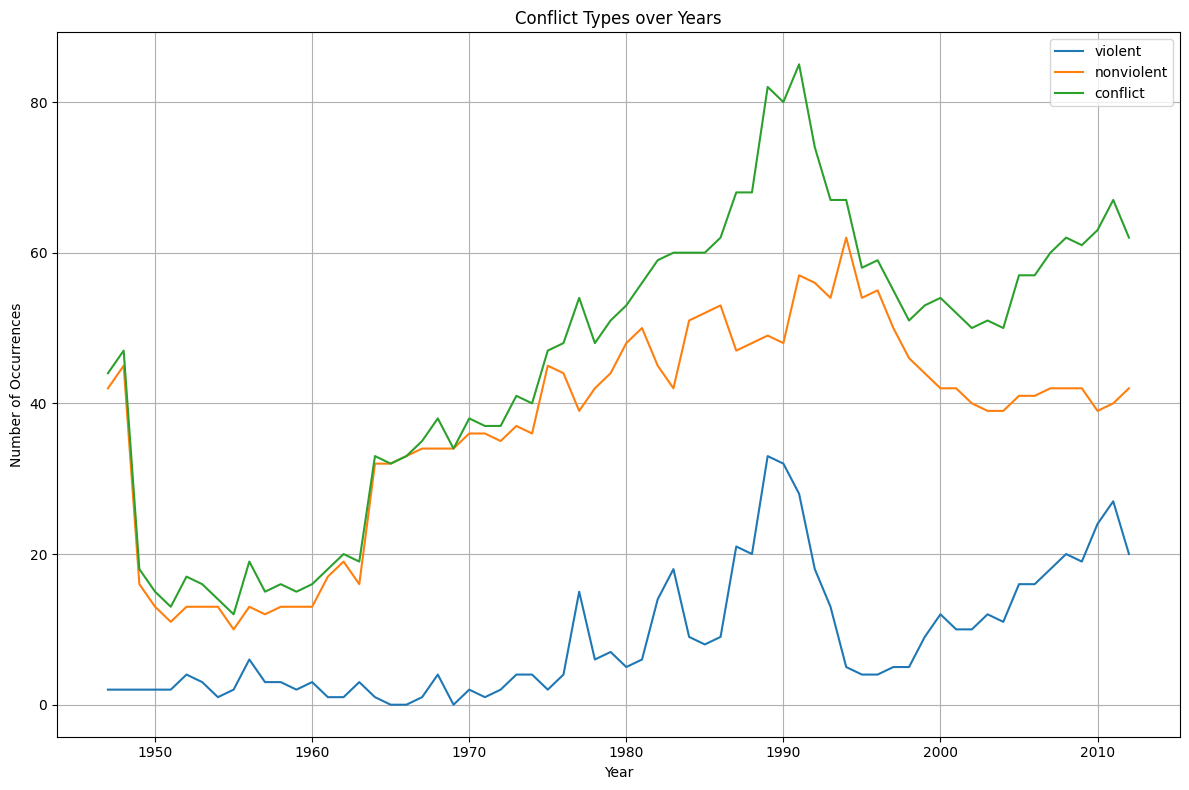

In [31]:
# Plot different types of conflicts over years

import matplotlib.pyplot as plt

# Group data by 'year' and sum up all "1"s for each variable
annual_counts = conflict.groupby('year')[['violent', 'nonviolent', 'conflict']].sum()

# Plot
plt.figure(figsize=(12, 8))
for column in annual_counts.columns:
    plt.plot(annual_counts.index, annual_counts[column], label=column)

plt.title('Conflict Types over Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
### let's explore missing observations

na_count = conflict.isnull().sum()
na_sorted = na_count.sort_values(ascending=False)
na_sorted

wdi_foodins          13958
bti_eo               13393
wdi_litrad           13311
gfs_educ             13003
gggi_ggi             12950
gggi_eas             12950
wdi_belmedinc        12608
oecd_pphlthxp_t1c    12540
ucdp_type3           12290
div_ideology         10955
div_urban_rural      10955
dias_support         10955
div_class            10955
div_age              10955
div_ethnicity        10955
div_religion         10955
div_gender           10955
prim_meth            10955
repression           10955
ingo_support         10955
wdi_expmil            7394
wdi_gniatlcur         6781
pwt_hci               6219
wdi_gdpcapcon2015     6148
pwt_pop               5270
pwt_rgdp              5270
wdi_lifexp            5033
mad_gdppc             4782
p_polity2             4619
vdem_gender           4548
fe_cultdiv            3474
cow                    847
year                     0
violent                  0
nonviolent               0
conflict                 0
dtype: int64

In [35]:
conflict.fillna(conflict.mean(), inplace=True)

# Fill missing values with a specific constant
conflict.fillna(0, inplace=True)

/tmp/ipykernel_33/2762399180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict.fillna(conflict.mean(), inplace=True)
/tmp/ipykernel_33/2762399180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict.fillna(0, inplace=True)


In [36]:
na_count = conflict.isnull().sum()
na_sorted = na_count.sort_values(ascending=False)
na_sorted

pwt_hci              0
pwt_pop              0
wdi_gniatlcur        0
wdi_gdpcapcon2015    0
prim_meth            0
div_gender           0
div_age              0
div_class            0
div_urban_rural      0
div_ideology         0
div_ethnicity        0
div_religion         0
repression           0
ingo_support         0
dias_support         0
violent              0
nonviolent           0
year                 0
cow                  0
wdi_lifexp           0
gggi_ggi             0
pwt_rgdp             0
vdem_gender          0
wdi_belmedinc        0
wdi_litrad           0
p_polity2            0
fe_cultdiv           0
gfs_educ             0
ucdp_type3           0
mad_gdppc            0
wdi_expmil           0
oecd_pphlthxp_t1c    0
bti_eo               0
wdi_foodins          0
gggi_eas             0
conflict             0
dtype: int64

In [37]:
conflict.shape

(13958, 36)

In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(conflict) 

In [39]:
conflict.shape

(13958, 36)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = conflict [['pwt_hci', 'pwt_pop', 'pwt_rgdp', 'vdem_gender', 'wdi_belmedinc', 'wdi_litrad', 'p_polity2', 'fe_cultdiv', 'gggi_ggi', 'gfs_educ', 'mad_gdppc', 'wdi_expmil', 'oecd_pphlthxp_t1c', 'bti_eo', 'wdi_foodins', 'gggi_eas', 'ucdp_type3', 'wdi_lifexp', 'cow', 'year', 'wdi_gniatlcur', 'wdi_gdpcapcon2015',"div_gender", "div_age", "div_class", "div_urban_rural", "div_ideology", "div_ethnicity", "div_religion", "repression", "ingo_support", "dias_support"]]
y = conflict[["violent"]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.03737492119001211


In [42]:
# prompt: print the number of 1 vs 0 values for the "violent" column in conflict

violent_ones = conflict['violent'].sum()
violent_zeros = conflict.shape[0] - violent_ones
print(f"Number of 1s in 'violent' column: {violent_ones}")
print(f"Number of 0s in 'violent' column: {violent_zeros}")


Number of 1s in 'violent' column: 576.0
Number of 0s in 'violent' column: 13382.0


# Random Forest

To predict violent or nonviolent based on population, ethnic fractalization, and religous fractalization. Could add more.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# define variables
X = conflict [['pwt_hci', 'pwt_pop', 'pwt_rgdp', 'vdem_gender', 'wdi_belmedinc', 'wdi_litrad', 'p_polity2', 'fe_cultdiv', 'gggi_ggi', 'gfs_educ', 'mad_gdppc', 'wdi_expmil', 'oecd_pphlthxp_t1c', 'bti_eo', 'wdi_foodins', 'gggi_eas', 'ucdp_type3', 'wdi_lifexp', 'cow', 'year', 'wdi_gniatlcur', 'wdi_gdpcapcon2015',"div_gender", "div_age", "div_class", "div_urban_rural", "div_ideology", "div_ethnicity", "div_religion", "repression", "ingo_support", "dias_support"]]
y = conflict[["violent"]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


/tmp/ipykernel_33/4180489047.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.9906876790830945


Feature ranking:
31. ingo_support (0.12076369781381935)
20. year (0.09159195330308177)
30. repression (0.08115537914124289)
19. cow (0.05636988661594633)
24. div_age (0.04674531229605147)
29. div_religion (0.037498389280680944)
8. fe_cultdiv (0.03746816102607701)
18. wdi_lifexp (0.03573678928441919)
27. div_ideology (0.03484368698854517)
11. mad_gdppc (0.034576607900553676)
23. div_gender (0.03351686726784152)
2. pwt_pop (0.03242722765230067)
25. div_class (0.031022236686414906)
4. vdem_gender (0.028821237803508478)
1. pwt_hci (0.02878756398128375)
12. wdi_expmil (0.028651368818380422)
28. div_ethnicity (0.02786229045207084)
32. dias_support (0.027045408782174703)
7. p_polity2 (0.027003160100858334)
3. pwt_rgdp (0.026814431776471956)
26. div_urban_rural (0.02680135473831187)
22. wdi_gdpcapcon2015 (0.025256441586113874)
21. wdi_gniatlcur (0.02313221344612006)
17. ucdp_type3 (0.02215981549577607)
9. gggi_ggi (0.006626118336285735)
5. wdi_belmedinc (0.005640829383693823)
13. oecd_pphlthxp

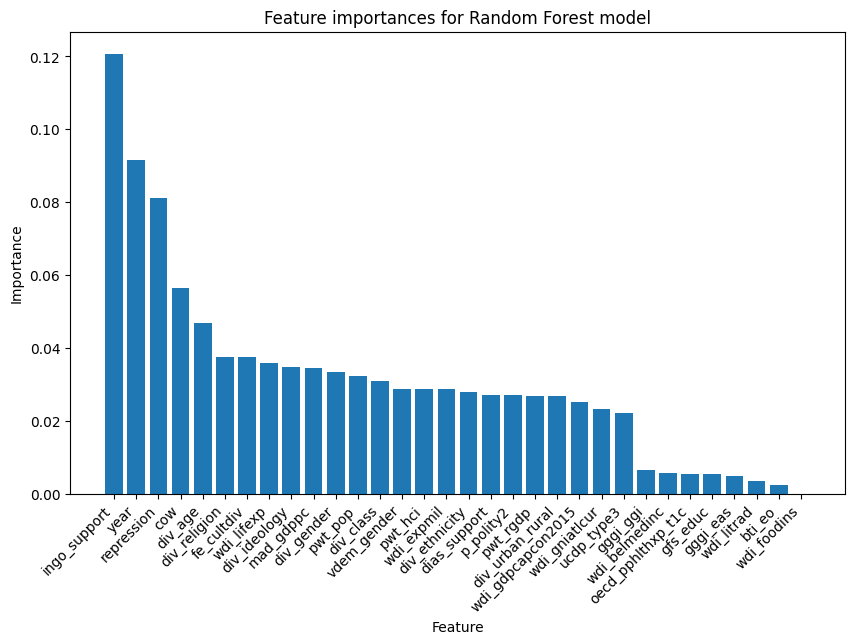

In [44]:
#feature importance for the model

import matplotlib.pyplot as plt
import numpy as np
importances = model.feature_importances_


sorted_indices = np.argsort(importances)[::-1]


print("Feature ranking:")

for i in sorted_indices:
    print(f"{i+1}. {X.columns[i]} ({importances[i]})")

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances for Random Forest model")
plt.show()


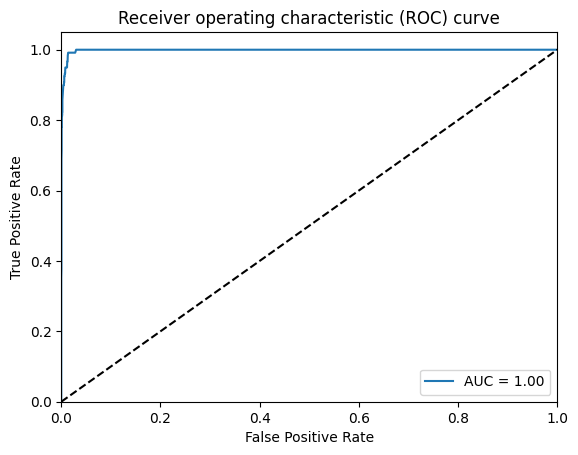

In [45]:
#plot an roc curve for the model to assess how well it performs

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()


In [69]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# define variables
X = conflict [['pwt_hci', 'pwt_pop', 'pwt_rgdp', 'vdem_gender', 'wdi_belmedinc', 'wdi_litrad', 'p_polity2', 'fe_cultdiv', 'gggi_ggi', 'gfs_educ', 'mad_gdppc', 'wdi_expmil', 'oecd_pphlthxp_t1c', 'bti_eo', 'wdi_foodins', 'gggi_eas', 'ucdp_type3', 'wdi_lifexp', 'cow', 'year', 'wdi_gniatlcur', 'wdi_gdpcapcon2015',"div_gender", "div_age", "div_class", "div_urban_rural", "div_ideology", "div_ethnicity", "div_religion", "repression", "ingo_support", "dias_support"]]
y = conflict[["conflict"]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {}
for target_column in y.columns:
    model = LogisticRegression()
    model.fit(X_train, y_train[target_column])
    models[target_column] = model


predictions = {}
for target_column, model in models.items():
    predictions[target_column] = model.predict(X_test)

# Evaluate the model
for target_column in y.columns:
    accuracy = accuracy_score(y_test[target_column], predictions[target_column])
    print(f"Accuracy for {target_column}: {accuracy}")
    print(f"Classification Report for {target_column}:")
    print(classification_report(y_test[target_column], predictions[target_column]))
    
    # Precision
precision = precision_score(y_train, y_test)
# Recall
recall = recall_score(y_train, y_test)

# ROC AUC
roc_auc = roc_auc_score(y_train, y_test)  # For binary classification with predicted probabilities

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print(f'Precision: {precision:.4f}')

Accuracy for conflict: 0.7879656160458453
Classification Report for conflict:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2200
           1       0.00      0.00      0.00       592

    accuracy                           0.79      2792
   macro avg       0.39      0.50      0.44      2792
weighted avg       0.62      0.79      0.69      2792



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Found input variables with inconsistent numbers of samples: [11166, 2792]

In [47]:
#Timelag attempt
from sklearn.model_selection import train_test_split


X = conflict.drop(columns=['violent', 'nonviolent', 'conflict'])
y = conflict[['violent', 'nonviolent', 'conflict']]


# Split the data based on the year
#X_train = X[X['year'] < 1975]
#y_train = y[X['year'] < 1975]

#X_test = X[X['year'] >= 1975]
#y_test = y[X['year'] >= 1975]


#X_train = X_train.drop(columns=['year'])
#X_test = X_test.drop(columns=['year'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#Time lag attempt, cont'd

lagged_vars = ['violent_lag1', 'nonviolent_lag1', 'conflict_lag1']

# Function to create train and test set by including only one specific lagged variable
def create_dataset_with_single_lagged_variable(X_train, X_test, include_var):

    X_train_modified = X_train.copy()
    X_test_modified = X_test.copy()


    vars_to_drop = [var for var in lagged_vars if var != include_var and var in lagged_vars]
    X_train_modified.drop(columns=vars_to_drop, inplace=True)
    X_test_modified.drop(columns=vars_to_drop, inplace=True)

    return X_train_modified, X_test_modified

In [51]:
# Creating three train and test sets for features
X1_train, X1_test = create_dataset_with_single_lagged_variable(X_train, X_test, 'violent_lag1')
X2_train, X2_test = create_dataset_with_single_lagged_variable(X_train, X_test, 'nonviolent_lag1')
X3_train, X3_test = create_dataset_with_single_lagged_variable(X_train, X_test, 'conflict_lag1')


KeyError: "['nonviolent_lag1', 'conflict_lag1'] not found in axis"

In [ ]:
# Creating three train and test sets for target variables
y1_train, y2_train, y3_train = y_train['violent'], y_train['nonviolent'], y_train['conflict']
y1_test, y2_test, y3_test = y_test['violent'], y_test['nonviolent'], y_test['conflict']

In [ ]:
##Scaling features

from sklearn.preprocessing import StandardScaler


scalers = [StandardScaler() for _ in range(5)]

# Scale each pair of datasets
X1_train_scaled = scalers[0].fit_transform(X1_train)
X1_test_scaled = scalers[0].transform(X1_test)

X2_train_scaled = scalers[1].fit_transform(X2_train)
X2_test_scaled = scalers[1].transform(X2_test)

X3_train_scaled = scalers[2].fit_transform(X3_train)
X3_test_scaled = scalers[2].transform(X3_test)

NameError: name 'X1_train' is not defined